# Entrega do Handson 02

## D02: Passo 2 da Prática 03: Abrindo e reproduzindo arquivos de música

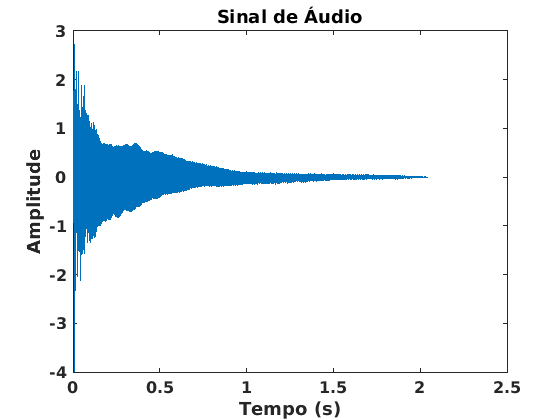

In [3]:
close all;clc;clear all;                                          % Limpa variáveis e fecha todos os gráficos
soundFile = ['./sound_01.wav'];             % Especifica do local e nome do arquivo de áudio
[vtSom, dFa] = audioread(soundFile);                              % Abre arquivo de áudio de um arquivo
% vtSom: amplitude das amostras de som
% dFa: frequência de amostrasgem do som (amostragem no tempo)
vtSom = 4*vtSom;
dta = 1/dFa;                                                      % Tempo entre amostras
dTFinal = (length(vtSom)-1)*dta;                                  % Tempo da última amostra do sinal de áudio
vtTSom = 0:dta:dTFinal;                                           % Eixo temporal do arquivo de áudio
plot(vtTSom,vtSom);                                               % Plota gráfico do áudio
set(gcf,'color',[1 1 1]);                                         % Configura área da figura
set(gca,'FontWeight','bold','FontSize',12);                       % Configura área do gráfico
title(['Sinal de Áudio']);                                        % Configura título do gráfico
ylabel('Amplitude');                                              % Configura eixo X do gráfico
xlabel('Tempo (s)');                                              % Configura eixo Y do gráfico
p = audioplayer(vtSom, 1*dFa);                                    % Reproduzir arquivo de áudio
play(p);   

## D03: Passo 5 Prática 1: Geração, reprodução e plotagem de um tom de áudio

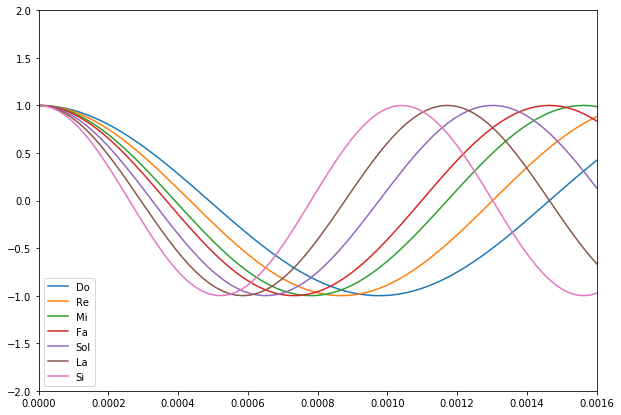

0

In [1]:
import numpy as np           #importando as bibliotecas necessárias:
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
import os

                             # Parâmetros da onda:
tf = 1                       # Tempo de duração da nota
fc = 512                     # Frequência da nota Dó
fs = 100*fc                  # Frequencia de amostragem da nota. 
t =np.arange(0,tf+1/fs,1/fs) # Vetor tempo. Para cada elemento do vetor t, haverá um elemento em y correspondente.
A = 1     

yDo=A*np.cos(2*np.pi*fc*t)                   # Amplitude do sinal
yRe=A*np.cos(2*(9/8)*np.pi*fc*t)     # Sinal senoidal
yMi=A*np.cos(2*(5/4)*np.pi*fc*t)
yFa=A*np.cos(2*(4/3)*np.pi*fc*t)
ySol=A*np.cos(2*(3/2)*np.pi*fc*t)
yLa=A*np.cos(2*(5/3)*np.pi*fc*t)
ySi=A*np.cos(2*(15/8)*np.pi*fc*t)

plt.figure(1,figsize=[10,7]) # cria instância da figura para poder alterar seu tamanho
plt.plot(t,yDo)
plt.plot(t,yRe)
plt.plot(t,yMi)
plt.plot(t,yFa)
plt.plot(t,ySol)
plt.plot(t,yLa)
plt.plot(t,ySi)       
plt.legend(['Do','Re','Mi','Fa','Sol','La','Si'])         # Visualizar o sinal gerado  
plt.axis([0,0.0016,-2,2])      # Zoom para melhor visualização  
plt.show() 

#importando e armazenando o arquivo de áudio numa variável
som = wv.read('./sound_01.wav')

#salvando o tom gerado em um arquivo de extensão .wav :
wv.write('./tom_gerado2.wav',fs,yDo)
#reproduzindo o arquivo

os.system('cvlc --play-and-exit ./tom_gerado2.wav') 

## D04: Passo 4 Prática 2: Abrindo e reproduzindo arquivos de música 

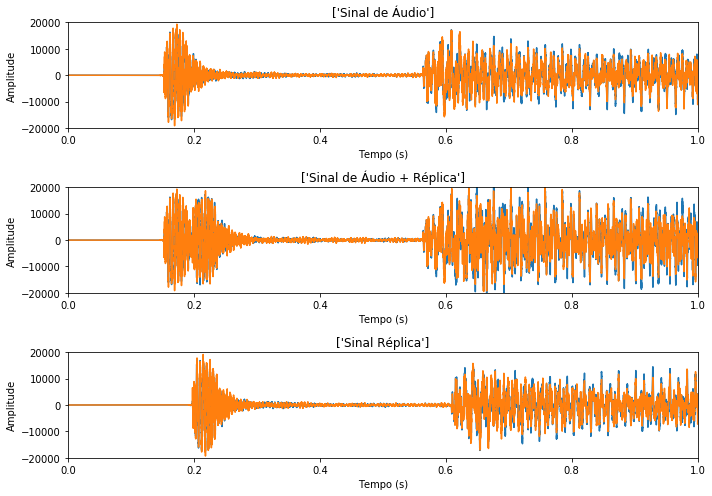

In [2]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt

soundFile = './sound_02.wav' # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                     # Abre arquivo
tf = 10                                            # Tempo que deseja tocar o arquivo
amostrasTf = int(np.ceil(tf*dFa))                  # Número de amostras para o tempo especificado
vtSom = vtSom[0:amostrasTf,:]                      # Considera somente as amostras para o tempo especificado
dta = 1/dFa                                        # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                       # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)              # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(vtTSom,vtSom)                             # Plota gráfico do áudio
plt.xlim([0,1])  
plt.ylim([-20000,20000])
plt.title(['Sinal de Áudio'])                    # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

wv.write('./sem_eco.wav',dFa,vtSom)
os.system('cvlc --play-and-exit ./sem_eco.wav') 

## Modifica o arquivo incluindo eco (uma réplica atrasada do sinal oirginal)
n = 2000                                           # Atraso da réplica do sinal                                                          
eco = np.zeros([len(vtSom),2])
end=len(vtSom)
eco[n:,:] = vtSom[0:end-n,:] 
vtSomEco = np.zeros([len(eco),2])
vtSomEco += eco
vtSomEco += vtSom

wv.write('./com_eco.wav',dFa,vtSomEco.astype('int16'))
os.system('cvlc --play-and-exit ./com_eco.wav') 

plt.subplot(312)                                   # Segundo gráfico do subplot


plt.plot(vtTSom,vtSomEco)       
plt.xlim([0,1])                   # Plota gráfico do áudio
plt.ylim([-20000,20000])
plt.title(['Sinal de Áudio + Réplica'])            # Configura título do gráfico  
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    


plt.subplot(3,1,3)                                 # Terceiro gráfico do subplot
plt.plot(vtTSom,vtSom-vtSomEco)                    # Plota gráfico do áudio
plt.xlim([0,1])
plt.ylim([-20000,20000])   
plt.title(['Sinal Réplica'])                       # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

plt.tight_layout()
plt.show()